# Heavy Metal / Ferromagnet Boundary Conditions

Import libraries

In [3]:
import OneD_SDD as sdd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cycler

Define system

In [4]:
ints = np.array([0.0,10.0e-9,15e-9])
E = np.array([1e6,0,0]) # A/m^2 
FM = sdd.FM_BulkParameters( De = 0.001, sigma = 5e6, l_sf = 3e-9, l_J = 2.0e-9, l_phi = 0.8e-9, m = np.array([1,1,1])/np.sqrt(3), beta_S = 0.46, beta_D = 0.46)
NM = sdd.HM_BulkParameters( De = 0.001, sigma = 5e6, l_sf =  2.57e-9, theta_SHAy = 0.059)
bulk_params = [NM, FM]

Define projection operators

In [5]:
def field_like(m):
    f = np.cross(m, np.array([0, -1, 0]))
    if np.linalg.norm(f) != 0:
        f /= np.linalg.norm(f)
    return f

def damping_like(m):
    d = np.cross(m,np.cross(m, np.array([0, -1, 0])))
    if np.linalg.norm(d) != 0:
        d /= np.linalg.norm(d)
    return d

Solve system using continous boundary conditions

In [6]:
Rashba_int = sdd.Continuous_InterfaceParameters()
int_params = [Rashba_int]

LinSys = sdd.SDD_1D_solver(E,ints, bulk_params, int_params)
LinSys.solve_linear_system()
Total_torque = LinSys.get_total_spin_torque()
z,Sx,Sy,Sz = LinSys.get_spin_accumulation()
z,Jsx,Jsy,Jsz = LinSys.get_spin_current()  
z,Tsx,Tsy,Tsz = LinSys.get_spin_torque()

Sd1 = np.array([Sx,Sy,Sz]).T @ damping_like(FM.m)
Sf1 = np.array([Sx,Sy,Sz]).T @ field_like(FM.m)
Sl1 = np.array([Sx,Sy,Sz]).T @ FM.m

Jd1 = np.array([Jsx,Jsy,Jsz]).T @ damping_like(FM.m)
Jf1 = np.array([Jsx,Jsy,Jsz]).T @ field_like(FM.m)
Jl1 = np.array([Jsx,Jsy,Jsz]).T @ FM.m

Td1 = np.array([Tsx,Tsy,Tsz]).T @ damping_like(FM.m)
Tf1 = np.array([Tsx,Tsy,Tsz]).T @ field_like(FM.m)
Tl1 = np.array([Tsx,Tsy,Tsz]).T @ FM.m

In [7]:
Rashba_int = sdd.RashbaSpinMixing_InterfaceParameters(0.42645,0.20055,0.01,0.0,16.0e9,1.12579e-15,6.00881e-15)
int_params = [Rashba_int]
LinSys = sdd.SDD_1D_solver(E,ints, bulk_params, int_params)
LinSys.solve_linear_system()
Total_torque = LinSys.get_total_spin_torque()
z,Sx,Sy,Sz = LinSys.get_spin_accumulation()
z,Jsx,Jsy,Jsz = LinSys.get_spin_current()  
z,Tsx,Tsy,Tsz = LinSys.get_spin_torque()

Sd2 = np.array([Sx,Sy,Sz]).T @ damping_like(FM.m)
Sf2 = np.array([Sx,Sy,Sz]).T @ field_like(FM.m)
Sl2 = np.array([Sx,Sy,Sz]).T @ FM.m

Jd2 = np.array([Jsx,Jsy,Jsz]).T @ damping_like(FM.m)
Jf2 = np.array([Jsx,Jsy,Jsz]).T @ field_like(FM.m)
Jl2 = np.array([Jsx,Jsy,Jsz]).T @ FM.m

Td2 = np.array([Tsx,Tsy,Tsz]).T @ damping_like(FM.m)
Tf2 = np.array([Tsx,Tsy,Tsz]).T @ field_like(FM.m)
Tl2 = np.array([Tsx,Tsy,Tsz]).T @ FM.m

Reading quadrature points and weights
Quadrature computation time:  0.09070682525634766


In [8]:
Rashba_int = sdd.RashbaPerturbSpinMixing_InterfaceParameters(0.42645,0.20055,0.01,0.0,16.0e9,1.12579e-15,6.00881e-15)
int_params = [Rashba_int]
LinSys = sdd.SDD_1D_solver(E,ints, bulk_params, int_params)
LinSys.solve_linear_system()
Total_torque = LinSys.get_total_spin_torque()
z,Sx,Sy,Sz = LinSys.get_spin_accumulation()
z,Jsx,Jsy,Jsz = LinSys.get_spin_current()  
z,Tsx,Tsy,Tsz = LinSys.get_spin_torque()

Sd3 = np.array([Sx,Sy,Sz]).T @ damping_like(FM.m)
Sf3 = np.array([Sx,Sy,Sz]).T @ field_like(FM.m)
Sl3 = np.array([Sx,Sy,Sz]).T @ FM.m

Jd3 = np.array([Jsx,Jsy,Jsz]).T @ damping_like(FM.m)
Jf3 = np.array([Jsx,Jsy,Jsz]).T @ field_like(FM.m)
Jl3 = np.array([Jsx,Jsy,Jsz]).T @ FM.m

Td3 = np.array([Tsx,Tsy,Tsz]).T @ damping_like(FM.m)
Tf3 = np.array([Tsx,Tsy,Tsz]).T @ field_like(FM.m)
Tl3 = np.array([Tsx,Tsy,Tsz]).T @ FM.m

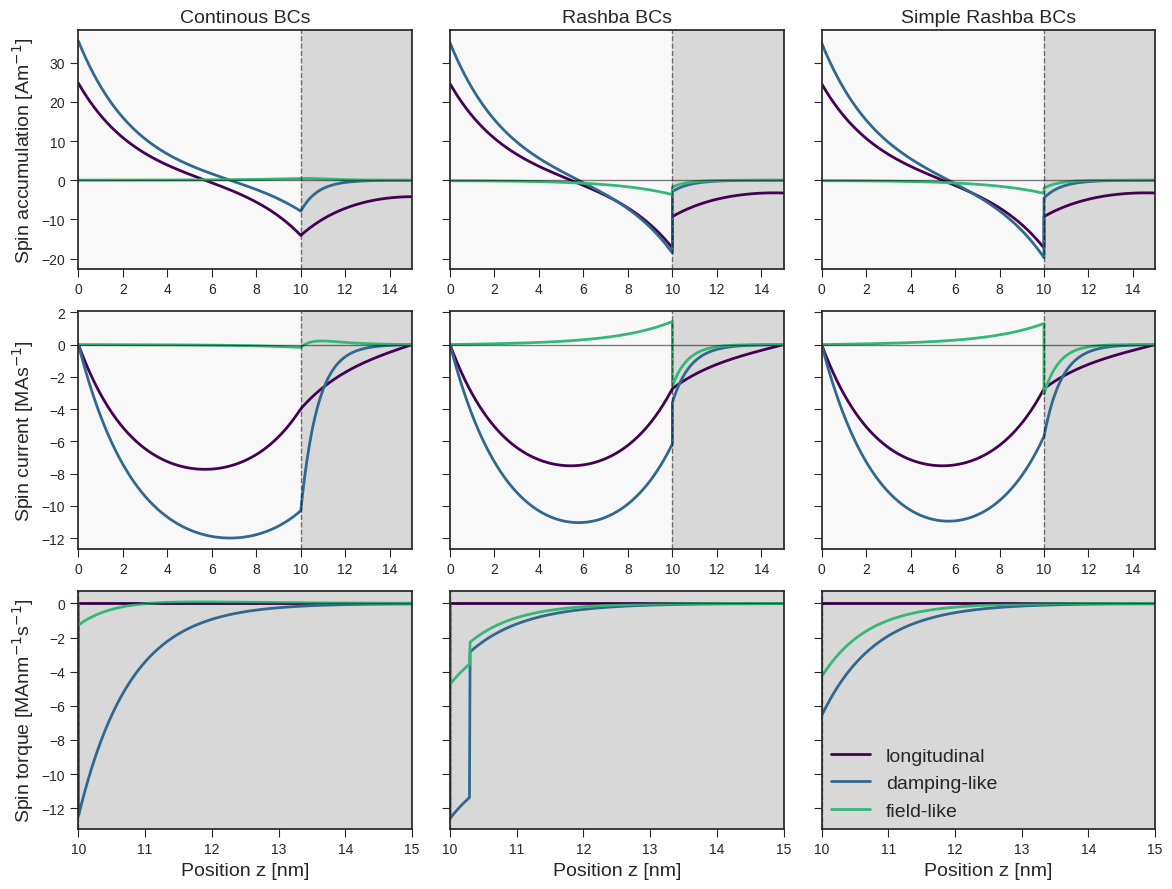

In [9]:
n =4
color = plt.cm.viridis(np.linspace(0, 1,n))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)
plt.style.use('seaborn-v0_8-ticks')
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='row', sharey="row", figsize=(12, 9))

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    # ax.set_box_aspect(1)
    ax.axvspan(0.0, 10.0, facecolor='gray', alpha=0.05)
    ax.axvspan(10.0, 15.0, facecolor='gray', alpha=0.3)
    # ax.fill_betweenx([-60, 60],0.0,10, color='gray', alpha=0.05)
    # ax.fill_betweenx([-60, 60],10.0, 15.0, color='gray', alpha=0.3)

ax1.plot(z*1e9,Sl1,label='',lw = 2.0)
ax1.plot(z*1e9,Sd1,label='',lw = 2.0)
ax1.plot(z*1e9,Sf1,label='',lw = 2.0)
ax2.plot(z*1e9,Sl2,label='',lw = 2.0)
ax2.plot(z*1e9,Sd2,label='',lw = 2.0)
ax2.plot(z*1e9,Sf2,label='',lw = 2.0)
ax3.plot(z*1e9,Sl3,label='',lw = 2.0)
ax3.plot(z*1e9,Sd3,label='',lw = 2.0)
ax3.plot(z*1e9,Sf3,label='',lw = 2.0)


ax4.plot(z*1e9,Jl1*1e-6,lw = 2.0)
ax4.plot(z*1e9,Jd1*1e-6,lw = 2.0)
ax4.plot(z*1e9,Jf1*1e-6,lw = 2.0)
ax5.plot(z*1e9,Jl2*1e-6,lw = 2.0)
ax5.plot(z*1e9,Jd2*1e-6,lw = 2.0)
ax5.plot(z*1e9,Jf2*1e-6,lw = 2.0)
ax6.plot(z*1e9,Jl3*1e-6,lw = 2.0)
ax6.plot(z*1e9,Jd3*1e-6,lw = 2.0)
ax6.plot(z*1e9,Jf3*1e-6,lw = 2.0)

ax7.plot(z*1e9,Tl1*1e-15, lw = 2.0, label='longitudinal')
ax7.plot(z*1e9,Td1*1e-15, lw = 2.0, label='damping-like')
ax7.plot(z*1e9,Tf1*1e-15, lw = 2.0, label='field-like')
ax8.plot(z*1e9,Tl2*1e-15, lw = 2.0, label='longitudinal')
ax8.plot(z*1e9,Td2*1e-15, lw = 2.0, label='damping-like')
ax8.plot(z*1e9,Tf2*1e-15, lw = 2.0, label='field-like')
ax9.plot(z*1e9,Tl3*1e-15, lw = 2.0, label='longitudinal')
ax9.plot(z*1e9,Td3*1e-15, lw = 2.0, label='damping-like')
ax9.plot(z*1e9,Tf3*1e-15, lw = 2.0, label='field-like')

ax9.legend(fontsize=14,fancybox=False, title_fontsize=10,borderpad=0.0)

ax1.set_title('Continous BCs', fontsize=14)
ax2.set_title('Rashba BCs', fontsize=14)
ax3.set_title('Simple Rashba BCs', fontsize=14)

ax7.set_xlabel('Position z [nm]',fontsize=14)
ax8.set_xlabel('Position z [nm]',fontsize=14)
ax9.set_xlabel('Position z [nm]',fontsize=14)
ax1.set_ylabel(r'Spin accumulation [Am$^{-1}$]',fontsize=14)
ax4.set_ylabel(r'Spin current [MAs$^{-1}$]',fontsize=14)
ax7.set_ylabel(r'Spin torque [MAnm$^{-1}$s$^{-1}$]',fontsize=14)

ax1.set_xlim(0,15)
ax4.set_xlim(0,15)
ax7.set_xlim(10,15)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    ax.axhline(0, color='k', linestyle='-', linewidth =1, alpha=0.5)
    ax.axvline(10, color='k', linestyle='--', linewidth =1, alpha=0.5)

plt.tight_layout()
plt.show()